# 서울시 범죄 발생 및 검거 현황 분석

## 데이터 획득

* 공공데이터포럼(https://www.data.go.kr/) 접근
* 검색어 : '서울시 5대 범죄 발생현황'
* 집계기간 설정 후 내려받기(TXT)

# 한글 설치

In [ ]:
!apt -qq -y install fonts-nanum
!apt-get install fonts-nanum* -qq

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 144629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-c

## 런타임 다시 시작

## 라이브러리 포함 및 사용 글꼴 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumGothic'
fm._rebuild()

## 파일 업로드 및 Colab과 GoogleDrive 연동

In [ ]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [ ]:
import pandas as pd
seoulCrime = pd.read_csv('gdrive/My Drive/빅데이터교육/서울5대범죄발생현황.txt', sep='\t')
seoulCrime.head(3)

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,2019,합계,"103,668","74,805",136,128,136,133,"6,469","6,007","42,204","21,284","54,723","47,253"
1,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"


## 데이터프레임 정제

* 첫 번째 행인 '자치구' 행과 '합계' 행 삭제
* '자치구' 열을 인덱스로 사용, '기간', '자치구', '합계', '합계.1' 열 삭제
* 열 이름 변경

In [ ]:
# 0번 행 삭제
seoulCrime.drop([0], inplace=True)
seoulCrime.head(3)

,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
1,2019,종로구,"3,846","4,117",4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
2,2019,중구,"4,327","2,804",2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
3,2019,용산구,"3,313","2,611",3,3,3,4,272,237,999,544,"2,036","1,823"


**inplace=True 옵션** <br>
데이터 프레임의 행 또는 열을 삭제하기 위하여 drop함수를 사용할 때<br> inplace=True 옵션을 사용해야 실제로 데이터 프레임을 변경시킬 수 있다. 

In [ ]:
# '자치구' 열의 항목을 인덱스로 설정하고, '자치구' 열 삭제
guList = list(seoulCrime['자치구'])
seoulCrime=seoulCrime.drop(['기간', '자치구', '합계', '합계.1'], axis=1)
seoulCrime.index = guList
# 열 이름 바꾸기
seoulCrime.columns = ['살인', '살인검거', '강도', '강도검거', '강간추행', '강간추행검거', '절도', '절도검거','폭력','폭력검거']

In [ ]:
seoulCrime

,살인,살인검거,강도,강도검거,강간추행,강간추행검거,절도,절도검거,폭력,폭력검거
종로구,4,5,7,8,238,"1,143","1,515","1,069","2,082","1,892"
중구,2,1,6,5,195,115,"2,202","1,050","1,922","1,633"
용산구,3,3,3,4,272,237,999,544,"2,036","1,823"
성동구,6,5,9,10,133,96,970,511,"1,394","1,216"
광진구,4,5,6,5,273,213,"1,875","1,008","1,853","1,585"
동대문구,6,6,10,9,168,143,"1,531",827,"1,977","1,833"
중랑구,10,10,4,5,138,108,"1,666",908,"2,450","2,107"
성북구,3,3,3,3,176,130,"1,082",731,"1,613","1,456"
강북구,6,6,3,2,176,145,"1,229",664,"2,424","2,206"
도봉구,1,1,5,5,90,83,790,394,"1,224","1,014"


**다음에 제시한 사항을 수행하시오.**
* 발생 및 검거 건수에 포함된 쉼표(,)를 제거하시오.
* 문자를 숫자로 바꾸시오.

(1) 쉼표(,) 제거

In [ ]:
delComma = lambda x : x.replace(',', '')
for i in range(5, 10):
    seoulCrime.iloc[:, i] = seoulCrime.iloc[:, i].apply(delComma)
seoulCrime.head(5)

,살인,살인검거,강도,강도검거,강간추행,강간추행검거,절도,절도검거,폭력,폭력검거
종로구,4,5,7,8,238,1143,1515,1069,2082,1892
중구,2,1,6,5,195,115,2202,1050,1922,1633
용산구,3,3,3,4,272,237,999,544,2036,1823
성동구,6,5,9,10,133,96,970,511,1394,1216
광진구,4,5,6,5,273,213,1875,1008,1853,1585


(2) 문자를 숫자로 변환

In [ ]:
for i in range(10):
    seoulCrime.iloc[:, i] = pd.to_numeric(seoulCrime.iloc[:, i])

In [ ]:
cols = ['살인검거율', '강도검거율', '강간추행검거율','절도검거율','폭력검거율']
for i in range(5):
    seoulCrime[cols[i]] = seoulCrime.iloc[:, i*2+1] / seoulCrime.iloc[:, i*2] * 100

seoulCrime.drop(['살인검거', '강도검거', '강간추행검거', '절도검거', '폭력검거'], axis=1, inplace=True)
seoulCrime.head()

,살인,강도,강간추행,절도,폭력,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율
종로구,4,7,238,1515,2082,125.000000,114.285714,480.252101,70.561056,90.874159
중구,2,6,195,2202,1922,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,3,3,272,999,2036,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,6,9,133,970,1394,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,4,6,273,1875,1853,125.000000,83.333333,78.021978,53.760000,85.536967


##5대 범죄 발생 건수에 대한 정규화

배열 데이터의 정규화 : <br>
norm = (Xi - minX) / (maxX - minX)

In [ ]:
import numpy as np
minX=[]
maxX=[]
for i in range(5):
    minX.append(np.min(seoulCrime.iloc[:, i]))
    maxX.append(np.max(seoulCrime.iloc[:, i]))
    norm = (seoulCrime.iloc[:, i]-minX[i])/(maxX[i] - minX[i])
    seoulCrime.iloc[:, i] = norm
seoulCrime

,살인,강도,강간추행,절도,폭력,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100.000000,90.000000,85.119048,54.016982,92.716237
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100.000000,125.000000,78.260870,54.501801,86.000000
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.000000,100.000000,73.863636,67.560074,90.266584
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.000000,100.000000,92.222222,49.873418,82.843137


## 정규화된 범죄 발생 정도와 검거율의 평균 계산

In [ ]:
seoulCrime['범죄'] = np.mean(seoulCrime.iloc[:, :5], axis=1)
seoulCrime['검거율'] = np.mean(seoulCrime.iloc[:, 5:10], axis=1)
seoulCrime

,살인,강도,강간추행,절도,폭력,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율,범죄,검거율
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,0.324118,176.194606
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.000000,83.333333,58.974359,47.683924,84.963580,0.311449,64.991039
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,0.210995,92.891690
성동구,0.416667,0.571429,0.074653,0.082569,0.069844,83.333333,111.111111,72.180451,52.680412,87.230990,0.243032,81.307260
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,0.336196,85.130456
동대문구,0.416667,0.642857,0.135417,0.339908,0.309367,100.000000,90.000000,85.119048,54.016982,92.716237,0.368843,84.370453
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100.000000,125.000000,78.260870,54.501801,86.000000,0.390630,88.752534
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.000000,100.000000,73.863636,67.560074,90.266584,0.150519,86.338059
강북구,0.416667,0.142857,0.149306,0.201376,0.493016,100.000000,66.666667,82.386364,54.027665,91.006601,0.280644,78.817459
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.000000,100.000000,92.222222,49.873418,82.843137,0.057143,84.987755


# 서울시 자치구별 CCTV 설치대수와 인구 자료를 병합한 파일 불러오기

In [ ]:
seoul = pd.read_excel('gdrive/My Drive/빅데이터교육/seoulCctvPopulation.xlsx')
seoul


,Unnamed: 0,CCTV수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,강남구,5221,80.970537,546158,541233,4925,73097,0.901754,13.383856
1,강동구,1879,112.797282,461547,457164,4383,67742,0.949632,14.677162
2,강북구,1265,131.684982,315395,311773,3622,62338,1.148401,19.765057
3,강서구,1617,123.961219,593203,586936,6267,87032,1.056468,14.671537
4,관악구,3985,186.278736,516318,499740,16578,77341,3.210812,14.979334
5,광진구,1581,131.818182,363925,349574,14351,49457,3.943395,13.589888
6,구로구,3227,100.808961,436707,405075,31632,68280,7.243300,15.635197
7,금천구,1634,322.222222,250554,232250,18304,38950,7.305411,15.545551
8,노원구,1906,116.345062,533041,528887,4154,83636,0.779302,15.690350
9,도봉구,858,88.157895,331744,329560,2184,60784,0.658339,18.322562


In [ ]:
guName=list(seoul['Unnamed: 0'])
del seoul['Unnamed: 0']
seoul.index=guName
seoul.head(3)

,CCTV수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
강남구,5221,80.970537,546158,541233,4925,73097,0.901754,13.383856
강동구,1879,112.797282,461547,457164,4383,67742,0.949632,14.677162
강북구,1265,131.684982,315395,311773,3622,62338,1.148401,19.765057


# 범죄 발생 정도와 CCTV 설치대수 사이의 상관관계 분석

In [ ]:
corrCctvCrime = pd.DataFrame({'CCTV수' : seoul['CCTV수'], '범죄발생' : seoulCrime['범죄']})
corrCctvCrime.corr(method='pearson')

,CCTV수,범죄발생
CCTV수,1.000000,0.497556
범죄발생,0.497556,1.000000


# 검거율과 CCTV 설치대수 사이의 상관관계 분석

In [ ]:
corrCctvCrime = pd.DataFrame({'CCTV수' : seoul['CCTV수'], '검거율' : seoulCrime['검거율']})
corrCctvCrime.corr(method='pearson')

,CCTV수,검거율
CCTV수,1.00000,-0.15669
검거율,-0.15669,1.00000


# '검거율'에 대한 히트맵(Heatmap) 그리기

## 검거율을 기준으로 내림차순 정렬

In [ ]:
sortedByArrest = seoulCrime.sort_values(by='검거율', ascending=False)
sortedByArrest

,살인,강도,강간추행,절도,폭력,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율,범죄,검거율
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.000000,114.285714,480.252101,70.561056,90.874159,0.324118,176.194606
강서구,0.583333,0.142857,0.375000,0.577982,0.547658,112.500000,133.333333,83.986928,52.536585,85.881893,0.445366,93.647748
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.000000,133.333333,87.132353,54.454454,89.538310,0.210995,92.891690
중랑구,0.750000,0.214286,0.083333,0.401835,0.503698,100.000000,125.000000,78.260870,54.501801,86.000000,0.390630,88.752534
은평구,0.166667,0.000000,0.180556,0.355505,0.366886,100.000000,100.000000,83.505155,62.428115,87.718470,0.213923,86.730348
성북구,0.166667,0.142857,0.149306,0.133945,0.159819,100.000000,100.000000,73.863636,67.560074,90.266584,0.150519,86.338059
구로구,0.750000,0.142857,0.236111,0.516514,0.545604,90.000000,133.333333,73.008850,50.365344,84.169279,0.438217,86.175361
광진구,0.250000,0.357143,0.317708,0.497706,0.258422,125.000000,83.333333,78.021978,53.760000,85.536967,0.336196,85.130456
송파구,0.500000,0.642857,0.317708,0.745872,0.726376,114.285714,100.000000,84.249084,42.052980,84.725936,0.586563,85.062743
도봉구,0.000000,0.285714,0.000000,0.000000,0.000000,100.000000,100.000000,92.222222,49.873418,82.843137,0.057143,84.987755


## 각 범죄자 검거율에 대한 히트맵 그리기

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

data = np.array(seoulCrime.iloc[:, 5:10])
data[data >= 150.0] = 150.0
cols = ['살인검거율',	'강도검거율',	'강간추행검거율',	'절도검거율',	'폭력검거율']
arrestRate = pd.DataFrame(data, index=sortedByArrest.index, columns=cols)
arrestRate

,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율
종로구,125.000000,114.285714,150.000000,70.561056,90.874159
강서구,50.000000,83.333333,58.974359,47.683924,84.963580
용산구,100.000000,133.333333,87.132353,54.454454,89.538310
중랑구,83.333333,111.111111,72.180451,52.680412,87.230990
은평구,125.000000,83.333333,78.021978,53.760000,85.536967
성북구,100.000000,90.000000,85.119048,54.016982,92.716237
구로구,100.000000,125.000000,78.260870,54.501801,86.000000
광진구,100.000000,100.000000,73.863636,67.560074,90.266584
송파구,100.000000,66.666667,82.386364,54.027665,91.006601
도봉구,100.000000,100.000000,92.222222,49.873418,82.843137


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'NanumBarunGothic'

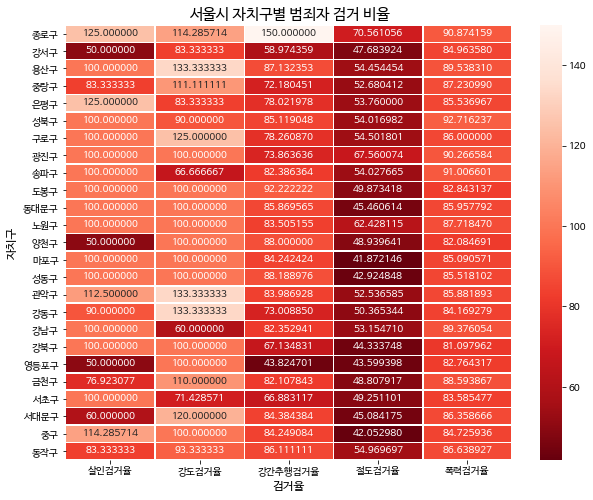

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('서울시 자치구별 범죄자 검거 비율', fontsize=15)
sb.heatmap(arrestRate, annot=True, fmt='f', linewidths=.5, cmap="Reds_r")
plt.xlabel('검거율', fontsize=12) #sb.heatmap() 함수보다 아랫쪽에 명시
plt.ylabel('자치구', fontsize=12)
plt.show()

# 각 범죄 발생 사이의 상관 관계 시각화

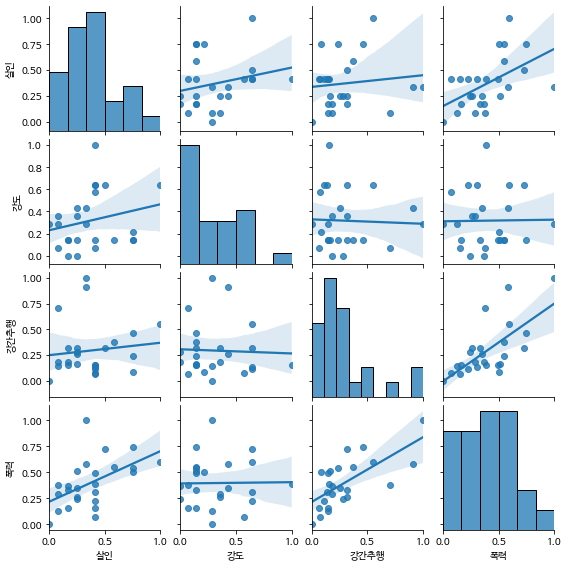

In [ ]:
sb.pairplot(seoulCrime, vars=['살인', '강도', '강간추행', '폭력'], kind='reg', height=2)
plt.show()

# 서울시의 '인구수', 'CCTV수'와 '살인', '강도' 발생 정도에 대한 상관관계 분석

In [ ]:
seoulCrime[['인구수', 'CCTV수']] = seoul[['인구수', 'CCTV수']]
seoulCrime.head(3)

,살인,강도,강간추행,절도,폭력,살인검거율,강도검거율,강간추행검거율,절도검거율,폭력검거율,범죄,검거율,인구수,CCTV수
종로구,0.250000,0.428571,0.256944,0.332569,0.352506,125.0,114.285714,480.252101,70.561056,90.874159,0.324118,176.194606,160520,1471
중구,0.083333,0.357143,0.182292,0.647706,0.286771,50.0,83.333333,58.974359,47.683924,84.963580,0.311449,64.991039,136030,1544
용산구,0.166667,0.142857,0.315972,0.095872,0.333607,100.0,133.333333,87.132353,54.454454,89.538310,0.210995,92.891690,245362,2063


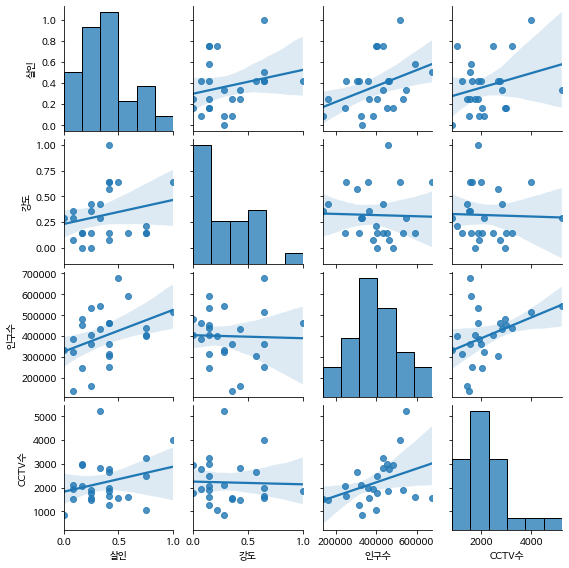

In [ ]:
sb.pairplot(seoulCrime, vars=['살인','강도', '인구수', 'CCTV수'],kind='reg', height=2)
plt.show()

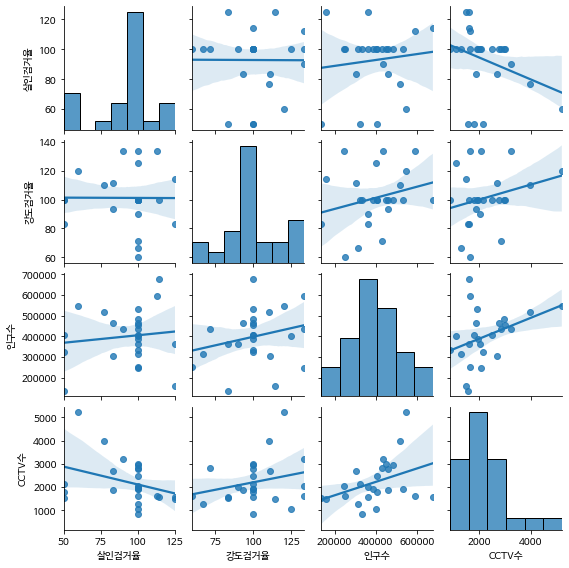

In [ ]:
sb.pairplot(seoulCrime, vars=['살인검거율','강도검거율', '인구수', 'CCTV수'], kind='reg', height=2)
plt.show()

### 결론 : 인구수나 CCTV의 수는 범죄의 발생 정도나 범인 검거율과는 유의미하게 상관관계가 있다고 할 수 없다.

참고. 결정계수(R^2, R-square) 구하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
df = pd.DataFrame({'A' : [1,2,3,4,4,4,5,4,3,7,7,7,8,9,9], 'B' : [2,3,3,3,4,5,6,6,7,7,8,8,8,9,9]})
df

,A,B
0,1,2
1,2,3
2,3,3
3,4,3
4,4,4
5,4,5
6,5,6
7,4,6
8,3,7
9,7,7


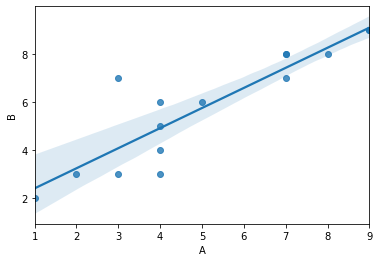

In [8]:
sb.regplot(x='A', y='B', data=df)
plt.show()

In [9]:
# 결정계수 계산
f = np.polyfit(df['A'], df['B'], 1)
f = np.poly1d(f)
x = np.array(df['A'])
exp_B = np.mean(df['B'])
SST = np.sum((df['B'] - exp_B)**2)
#SSE = np.sum((df['B'] - f(x))**2)
SSR = np.sum((f(x) - exp_B)**2)
Rsquare = SSR / SST
Rsquare

0.7917929750977764